Drive already mounted at /content/drive; to attempt to forcibly remount, call drive.mount("/content/drive", force_remount=True).

-------------------------------------------------------------------
The shape of X is : (5647, 66)

-------------------------------------------------------------------
The shape of y is : (5647, 1)

-------------------------------------------------------------------


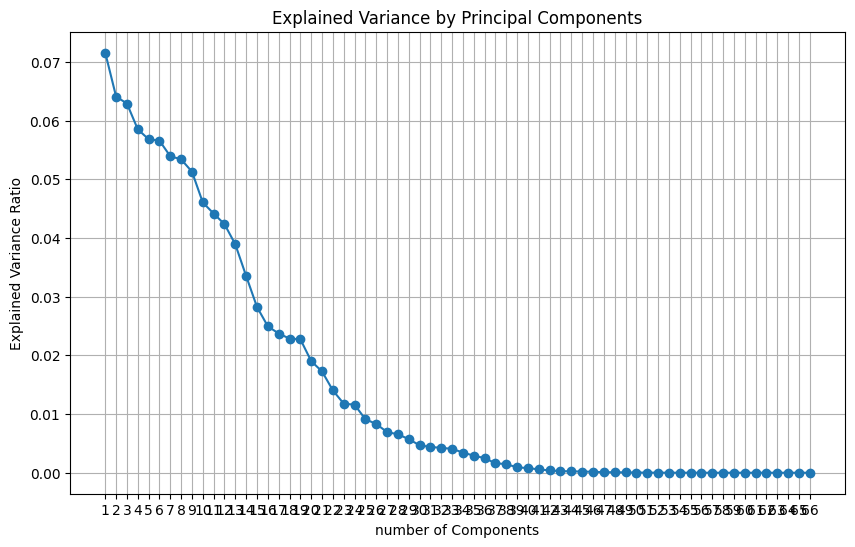


-------------------------------------------------------------------
DataFrame with selected principal components:
            PC1       PC2       PC3       PC4       PC5        PC6       PC7  \
0     -0.531921 -0.111409  0.223460 -0.306810 -0.716768   1.369607 -0.256134   
1      0.628350 -0.498287  0.046910  0.333997 -0.099570  -0.770838  0.198291   
2      1.979594  0.432638  0.011849  0.583708  0.423613   0.013125  0.134008   
3      0.040862  0.508886  0.884186  0.979439 -1.092478  -0.150423  0.020377   
4    -16.781681  1.945337 -5.959974 -7.428325 -0.495336  10.993943 -2.071000   
...         ...       ...       ...       ...       ...        ...       ...   
5642   1.509146  1.189175 -0.190738 -0.133853  0.493003   0.050681 -0.424372   
5643   1.628150  0.035821  0.581318  0.126489 -0.328496  -0.020172 -0.260023   
5644   1.841276  0.182577  0.619145  0.376612 -0.145637   0.843722 -0.159323   
5645   1.046921  0.122527  0.372516  0.161544 -0.010617   0.303357  0.026925   
5646 

In [ ]:
from google.colab import drive # Loading the Dataset

import pandas as pd
import os
from matplotlib import pyplot as plt
import seaborn as sns

from sklearn.model_selection import train_test_split
from sklearn.metrics import accuracy_score, classification_report, confusion_matrix, roc_auc_score
from sklearn.ensemble import RandomForestClassifier, IsolationForest
from sklearn.preprocessing import StandardScaler
from sklearn.decomposition import PCA

import numpy as np # Data Imputation
from sklearn.impute import KNNImputer # KNN Imputation
from imblearn.over_sampling import SMOTE # Data Imputation
from collections import Counter # Data Imputation

#from scipy.stats import chi2  Checking for Outliers by Mahalanobis Distance

drive.mount('/content/drive')
file_path = '/content/drive/My Drive/COMP7015 AI Project Group/mimiciv_traindata.csv'
print ('\n-------------------------------------------------------------------')
df = pd.read_csv(file_path)

# KNN Imputation (Imputation for Missing Value)
knn_imputer = KNNImputer(n_neighbors=3)
df_imputed = knn_imputer.fit_transform(df)

# Convert the result back to a DataFrame
df_imputed = pd.DataFrame(df_imputed, columns=df.columns)

def gen_feautre(df_imputed):
  # Calculate Range
  df_imputed['Fraction inspired oxygen_range'] =  df_imputed['Fraction inspired oxygen_max'] -  df_imputed['Fraction inspired oxygen_min']
  df_imputed['Glucose_range'] =  df_imputed['Glucose_max'] -  df_imputed['Glucose_min']
  df_imputed['Heart Rate_range'] =  df_imputed['Heart Rate_max'] -  df_imputed['Heart Rate_min']
  df_imputed['Mean blood pressure_range'] =  df_imputed['Mean blood pressure_max'] -  df_imputed['Mean blood pressure_min']
  df_imputed['Diastolic blood pressure_range'] =  df_imputed['Diastolic blood pressure_max'] -  df_imputed['Diastolic blood pressure_min']
  df_imputed['Systolic blood pressure_range'] =  df_imputed['Systolic blood pressure_max'] -  df_imputed['Systolic blood pressure_min']
  df_imputed['Oxygen saturation_range'] =  df_imputed['Oxygen saturation_max'] -  df_imputed['Oxygen saturation_min']
  df_imputed['Respiratory rate_range'] =  df_imputed['Respiratory rate_max'] -  df_imputed['Respiratory rate_min']
  df_imputed['Temperature_range'] =  df_imputed['Temperature_max'] -  df_imputed['Temperature_min']
  df_imputed['Weight_range'] =  df_imputed['Weight_max'] -  df_imputed['Weight_min']
  df_imputed['pH_range'] =  df_imputed['pH_max'] -  df_imputed['pH_min']

  # Create Ratios
  df_imputed['Fraction inspired oxygen_min_to_mean'] = df_imputed['Fraction inspired oxygen_min'] / df_imputed['Fraction inspired oxygen_mean']
  df_imputed['Fraction inspired oxygen_max_to_mean'] = df_imputed['Fraction inspired oxygen_max'] / df_imputed['Fraction inspired oxygen_mean']
  df_imputed['Glucose_min_to_mean'] = df_imputed['Glucose_min'] / df_imputed['Glucose_mean']
  df_imputed['Glucose_max_to_mean'] = df_imputed['Glucose_max'] / df_imputed['Glucose_mean']
  df_imputed['Heart Rate_min_to_mean'] = df_imputed['Heart Rate_min'] / df_imputed['Heart Rate_mean']
  df_imputed['Heart Rate_max_to_mean'] = df_imputed['Heart Rate_max'] / df_imputed['Heart Rate_mean']
  df_imputed['Mean blood pressure_min_to_mean'] = df_imputed['Mean blood pressure_min'] / df_imputed['Mean blood pressure_mean']
  df_imputed['Mean blood pressure_max_to_mean'] = df_imputed['Mean blood pressure_max'] / df_imputed['Mean blood pressure_mean']
  df_imputed['Diastolic blood pressure_min_to_mean'] = df_imputed['Diastolic blood pressure_min'] / df_imputed['Diastolic blood pressure_mean']
  df_imputed['Diastolic blood pressure_max_to_mean'] = df_imputed['Diastolic blood pressure_max'] / df_imputed['Diastolic blood pressure_mean']
  df_imputed['Systolic blood pressure_min_to_mean'] = df_imputed['Systolic blood pressure_min'] / df_imputed['Systolic blood pressure_mean']
  df_imputed['Systolic blood pressure_max_to_mean'] = df_imputed['Systolic blood pressure_max'] / df_imputed['Systolic blood pressure_mean']
  df_imputed['Oxygen saturation_min_to_mean'] = df_imputed['Oxygen saturation_min'] / df_imputed['Oxygen saturation_mean']
  df_imputed['Oxygen saturation_max_to_mean'] = df_imputed['Oxygen saturation_max'] / df_imputed['Oxygen saturation_mean']
  df_imputed['Respiratory rate_min_to_mean'] = df_imputed['Respiratory rate_min'] / df_imputed['Respiratory rate_mean']
  df_imputed['Respiratory rate_max_to_mean'] = df_imputed['Respiratory rate_max'] / df_imputed['Respiratory rate_mean']
  df_imputed['Temperature_min_to_mean'] = df_imputed['Temperature_min'] / df_imputed['Temperature_mean']
  df_imputed['Temperature_max_to_mean'] = df_imputed['Temperature_max'] / df_imputed['Temperature_mean']
  df_imputed['Weight_min_to_mean'] = df_imputed['Weight_min'] / df_imputed['Weight_mean']
  df_imputed['Weight_max_to_mean'] = df_imputed['Weight_max'] / df_imputed['Weight_mean']
  df_imputed['pH_min_to_mean'] = df_imputed['pH_min'] / df_imputed['pH_mean']
  df_imputed['pH_max_to_mean'] = df_imputed['pH_max'] / df_imputed['pH_mean']
  return df_imputed

df_imputed = gen_feautre(df_imputed)

# Features & Target
X = df_imputed.drop(columns='mortality')
y = df_imputed['mortality']

print(f'The shape of X is : {pd.DataFrame(X).shape}')
print ('\n-------------------------------------------------------------------')
print(f'The shape of y is : {pd.DataFrame(y).shape}')

# Features & Target
X = df_imputed.drop(columns='mortality')
y = df_imputed['mortality']

# Standardizing the Features by Z-score Normalization
scaler = StandardScaler()
X_scaled = scaler.fit_transform(X)

# Apply PCA
pca = PCA()
X_pca= pca.fit_transform(X_scaled)

# Explained variance ratio
explained_variance = pca.explained_variance_ratio_

# Plot explained variance to decide number of components
print ('\n-------------------------------------------------------------------')
plt.figure(figsize=(12,6))
plt.plot(range(1,len(explained_variance) + 1), explained_variance, marker='o')
plt.title('Explained Variance by Principal Components')
plt.xlabel('number of Components')
plt.ylabel('Explained Variance Ratio')
plt.xticks(range(1, len(explained_variance) + 1))
plt.grid()
plt.show()

# Choose the number of components
n_components = 0.95
cumulative_variance = np.cumsum(explained_variance)
n_components_selected = np.argmax(cumulative_variance >= n_components) + 1

# Transform the dataset to the selected number of components
pca = PCA(n_components = n_components_selected)
X_pca_selected = pca.fit_transform(X_scaled)

# Create a DataFrame with the selected principal components
columns = [f'PC{i+1}' for i in range(n_components_selected)]
df_pca = pd.DataFrame(data = X_pca_selected, columns=columns)

# Concatenate with the target variable
df_final = pd.concat([df_pca, y.reset_index(drop=True)], axis=1)

# Print the resulting DataFrame
print ('\n-------------------------------------------------------------------')
print('DataFrame with selected principal components:')
print(df_final)

# Split the data into training and testing sets
X_train, X_test, y_train, y_test = train_test_split(df_pca, y, test_size=0.2, random_state=42)

# Outlier Detection with Isolation Forest
iso_forest = IsolationForest(contamination=0.1, random_state=42)
iso_forest.fit(X_train)

# Predict Outliers (-1 for outlier, 1 for inlier)
iso_outlier_predictions = iso_forest.predict(X_train)

# Identify Outliers
outliers = X_train[iso_outlier_predictions == -1]

# Display Original Data Size and Outliers Found
print ('\n-------------------------------------------------------------------')
print (f'Size of training data: {X_train.shape}')
print (f'Outliers found: {outliers.shape}')

# Remove Outliers from the Training Data
X_train_cleaned = X_train[iso_outlier_predictions == 1]
y_train_cleaned = y_train[iso_outlier_predictions == 1]

print(f'Size of Cleaned X:', X_train_cleaned.shape)

# Applying SMOTE (Oversampling Technique)
smote = SMOTE(random_state = 42)
X_resampled, y_resampled = smote.fit_resample(X_train_cleaned, y_train_cleaned)
print ('\n-------------------------------------------------------------------')
print('Original Dataset Shape:', y_train_cleaned.value_counts())
print('\nResampled Dataset Shape:', y_resampled.value_counts())

# Initialize and fit the Random Forest Classifier
classifier = RandomForestClassifier(class_weight='balanced', random_state=42)
classifier.fit(X_resampled, y_resampled)

# Make predictions on the test set
y_pred = classifier.predict(X_test)

# Evaluate the model
accuracy = accuracy_score(y_test, y_pred)
print ('\n-------------------------------------------------------------------')
print(f'Accuracy with class weights balanced: {accuracy:.2f}')

# Print classification report (includes precision, recall, and F1 score)
print ('\n-------------------------------------------------------------------')
print('Classification Report with class weights balanced (0 - Alive / 1 - Dead):')
print('\n')
print(classification_report(y_test, y_pred))

# Get predicted probabilities for the positive class
y_pred_proba = classifier.predict_proba(X_test)[:, 1]

# Calculate ROC-AUC score
roc_auc = roc_auc_score(y_test, y_pred_proba)

# Evaluate the model
print ('\n-------------------------------------------------------------------')
print("Confusion Matrix:")
print(confusion_matrix(y_test, y_pred))

print ('\n-------------------------------------------------------------------')
print(f'ROC-AUC Score with class weights balanced: {roc_auc:.4f}')